
#**Allergen in Food Product**

Food Allergens is a substance present in food that can cause adverse immunogenic reaction to antigens with only small quantity. An allergic reaction usually manifests itself right away after eating and the symtomps usually related to the digestive systems (abdominal pain, bloating, vomiting, diarrhea), the respiratory systems (sneezing, coughing, asthma), the skin (itching, edema, urticaria, eczema), or the extreme is loss of conciousness (Winterova et al., 2021).
So in this case, machine learning can be utilize to predict food safety by analyzing patterns from previous food safety and associated data. Early warning and predictive modeling techniques could be helpful in process of putting up food safety monitoring programs. By combining these information, it could improve the quality and cost-effectiveness of monitoring (Wang et al., 2021)

The goal of this project is to conduct exploratory data analysis (EDA) related to allergenic substances and to develop two models. The first model predicts whether food products contain an allergen or not, and the second model predicts the allergenic substances in the food product based on the dataset. The description of the columns is as follows: <br>
1. **Food Product**: the name of the food product
2. **Main ingredient**: primary ingredent used in the food product
3. **Sweetener**: Any sweetening agent present in the product
4. **Fat/oil**: Type of fat or oil used in the food product
5. **Seasoning**: Seasoning or spices used to flavor the dish
6. **Allergen**: A list of allergens associated with food item specifying allergenic present
7. **Price ($)**: The price of the food product
8. **Customer rating**: with a scale of 5 reflecting their satisfaction
9. **Prediction**: Classification indicating whether food product contains allergen or not

# Importing Libraries

In [1]:
!pip install gradio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,hamming_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import shap
from sklearn.multioutput import MultiOutputClassifier
import gradio as gr
style.use('fivethirtyeight')

# Loading Dataset

In [3]:
# Mounting Google Drive in Colab
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [55]:
df = pd.read_excel('/content/gdrive/MyDrive/project_1_end_dataset/clean_augmented_logical.xlsx')
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,Contains
1,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",19.65,4.1,Contains
2,Cheddar Cheese,Cheese,NaN,NaN,Salt,Dairy,10.83,3.7,Contains
3,Ranch Dressing,Buttermilk,Sugar,Vegetable oil,"Garlic, herbs",Dairy,9.92,2.3,Contains
4,Caramel Popcorn,Popcorn,Sugar,Butter,Salt,Dairy,6.14,3.2,Contains


# Preprocessing Data

In [5]:
#Rename the columns name
df['Prediction'] = df['Prediction'].map({'Contains':1,'Does not contain':0})
df = df.rename(columns= {'Customer rating (Out of 5)' : 'Customer rating',
                         'Prediction' : 'Is_Allergen'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Food Product     1637 non-null   object 
 1   Main Ingredient  1637 non-null   object 
 2   Sweetener        250 non-null    object 
 3   Fat/Oil          1585 non-null   object 
 4   Seasoning        1623 non-null   object 
 5   Allergens        865 non-null    object 
 6   Price ($)        1637 non-null   float64
 7   Customer rating  1637 non-null   float64
 8   Is_Allergen      1636 non-null   float64
dtypes: float64(3), object(6)
memory usage: 115.2+ KB


In [7]:
df=df[['Food Product','Main Ingredient','Sweetener','Fat/Oil','Seasoning','Allergens','Is_Allergen']]

###  Descriptive analysis

In [8]:
categorical = ['Food Product','Main Ingredient','Sweetener','Fat/Oil','Seasoning','Allergens']
numerical = ['Is_Allergen']

In [103]:
from sklearn.preprocessing import OneHotEncoder

categorical = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning']

encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(df[categorical])

import joblib
joblib.dump(encoder, "preprocessor.pkl")


['preprocessor.pkl']

In [ ]:
df[categorical].describe()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens
count,1637,1637,250,1585,1623,865
unique,1033,134,9,32,184,37
top,Koshari Special,"Flour, Cheese",Sugar,Olive oil,Spices,"Wheat, Dairy"
freq,29,113,191,1020,177,260


According to the unique values above, the descriptive analysis of categorical can be describe below: <br>
1. **Food product** has *1033* unique values with **Koshari Special** are the category leader
2. There are *134* unique value in **Main Ingredient** and **Flour, Cheese	** are the ranking highest for almost 113 values
3. Nearly all of the data in this dataset include **Sugar** with only *9* unique values and *None* commonly occurring
4. **Fat/Oil** has *32* distinct values with **Olive oil** is the largest number in this category.
5. **Seasoning** possesses *184* distinct values and **Spices** at the top frequent number
6. The unique values of **Allergens** is *37* with **Wheat,Dairy** Allergens are the ranking highest for almost 260 values

In [ ]:
df[numerical].describe()

,Is_Allergen
count,1636.000000
mean,0.545232
std,0.498102
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


### Univariate analysis

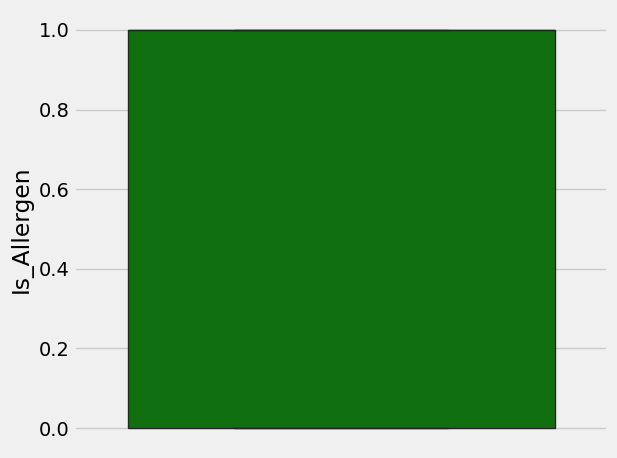

In [ ]:
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.boxplot(y=df[numerical[i]], color='green')
    plt.tight_layout()

#### Categorical

##### Food Products

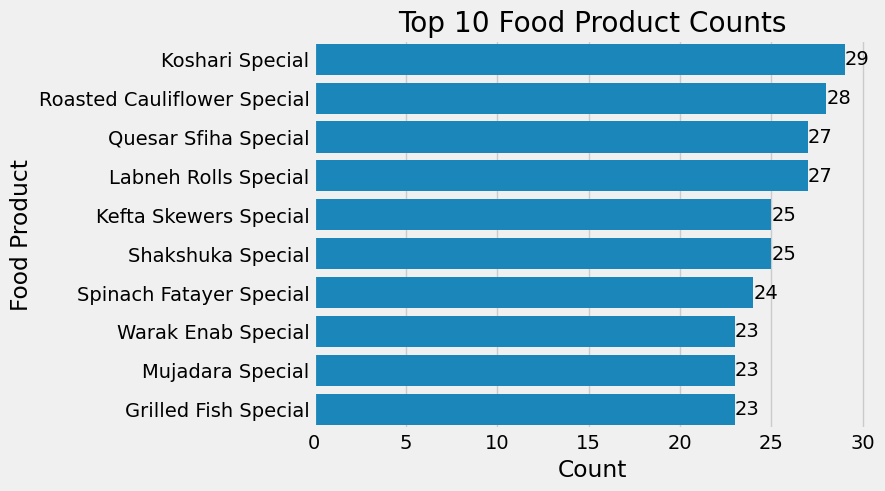

In [ ]:
ax = sns.countplot(y=df['Food Product'],orient='v', order=df['Food Product'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Food Product Counts')
plt.show()

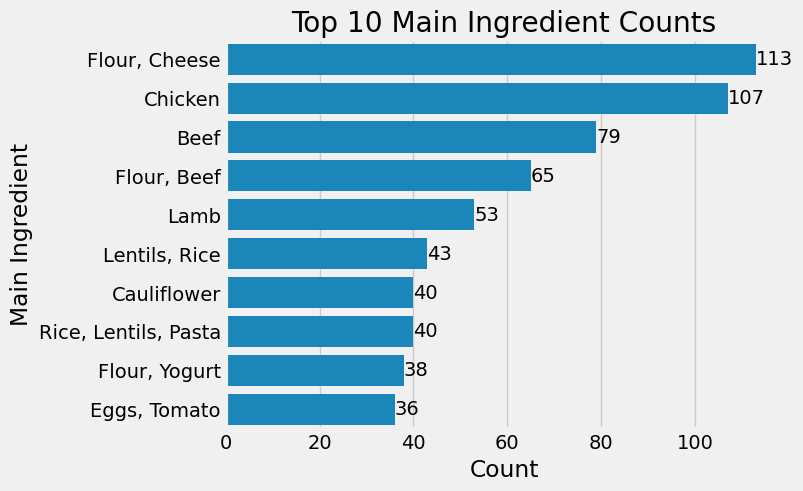

In [ ]:
ax = sns.countplot(y=df['Main Ingredient'],orient='v', order=df['Main Ingredient'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Main Ingredient Counts')
plt.show()

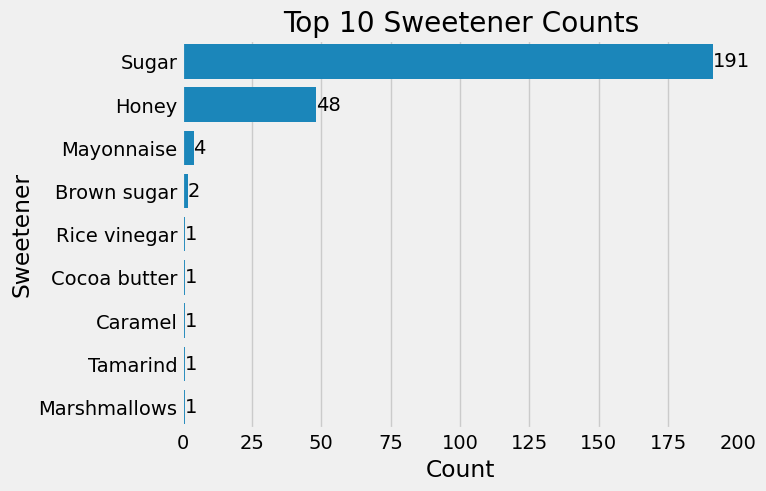

In [ ]:
ax = sns.countplot(y=df['Sweetener'],orient='v', order=df['Sweetener'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Sweetener Counts')
plt.show()

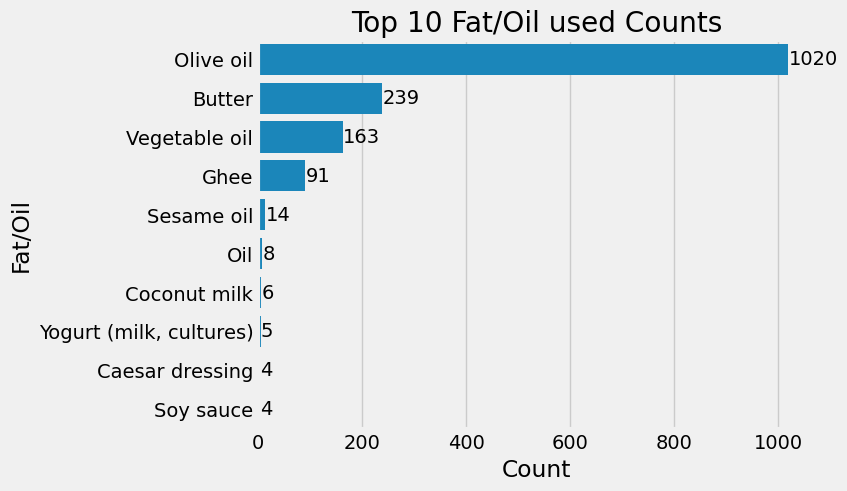

In [ ]:
ax = sns.countplot(y=df['Fat/Oil'],orient='v', order=df['Fat/Oil'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Fat/Oil used Counts')
plt.show()

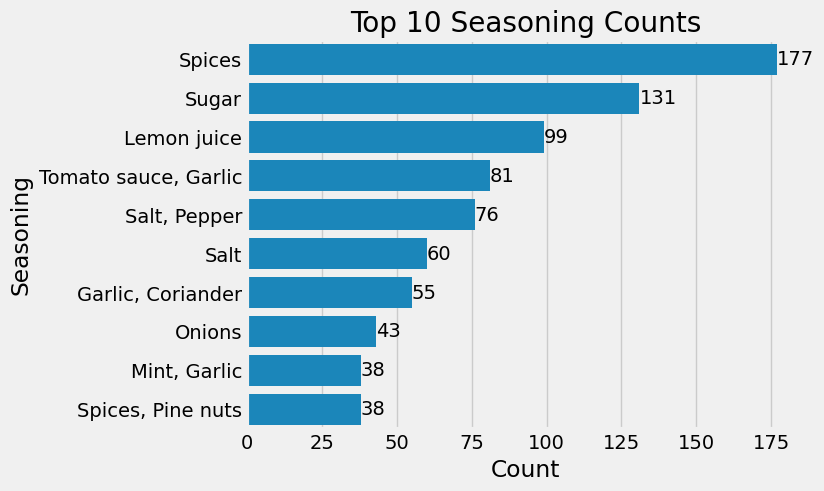

In [ ]:
ax = sns.countplot(y=df['Seasoning'],orient='v', order=df['Seasoning'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Seasoning Counts')
plt.show()

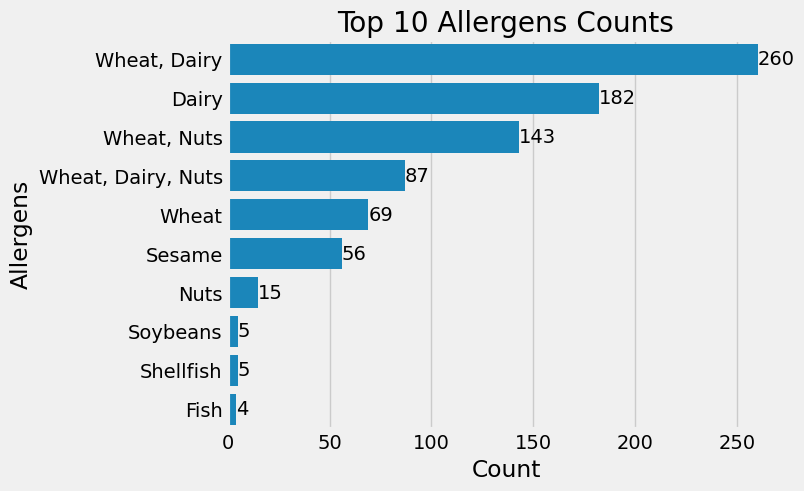

In [ ]:
ax = sns.countplot(y=df['Allergens'],orient='v', order=df['Allergens'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Allergens Counts')
plt.show()

## Exploratory Data Analysis

Text(0.5, 1.0, 'Percentage of Allergen contains in Foods')

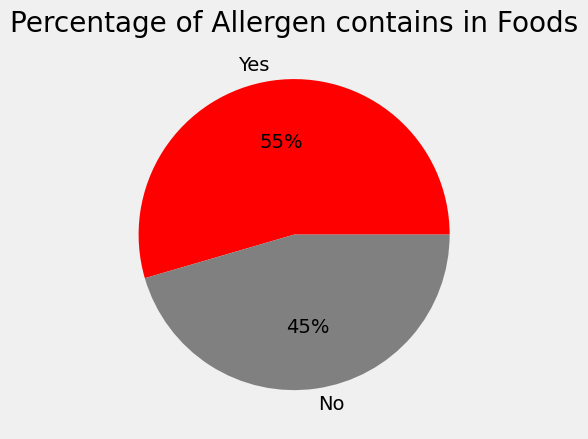

In [ ]:
#palette_col = sns.color_palette('red')
label = ['Yes','No']
ax = plt.pie(x = df['Is_Allergen'].value_counts(), labels=label, autopct='%.0f%%',colors=['red','grey'])
plt.title('Percentage of Allergen contains in Foods')

In [ ]:
df2 = df.groupby(['Food Product']).agg({'Is_Allergen' : 'sum'}).reset_index()
df2.sort_values(by= 'Is_Allergen', ascending=False)

,Food Product,Is_Allergen
766,Quesar Sfiha Special,27.0
582,Labneh Rolls Special,27.0
923,Spinach Fatayer Special,24.0
149,Cheese Manakish Special,22.0
758,Pistachio Baklava Special,19.0
...,...,...
1025,Warak Enab Deluxe,0.0
1024,Warak Enab,0.0
1021,Veggie Omelette,0.0
1020,Veggie Burger,0.0


Text(0.5, 1.0, 'Top 10 Total Percentage of Food Products which Contains Allergens')

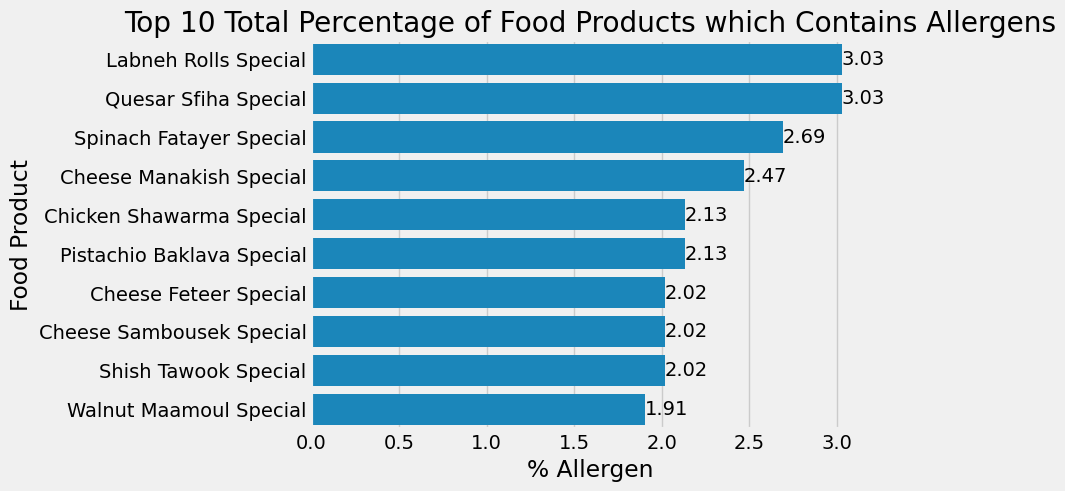

In [ ]:
df_food = (df.groupby(['Food Product']).agg({'Is_Allergen' : 'sum'})/df['Is_Allergen'].sum()*100).reset_index()
df_food.columns = ['Food Product','Percent_Allergen']
df_food
ax = sns.barplot(y='Food Product', x='Percent_Allergen', data=df_food.nlargest(10,'Percent_Allergen'))
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.xlabel('% Allergen')
plt.ylabel('Food Product')
plt.title('Top 10 Total Percentage of Food Products which Contains Allergens')

Text(0.5, 1.0, 'Top 10 Total Percentage of Main Ingredient which Contains Allergens')

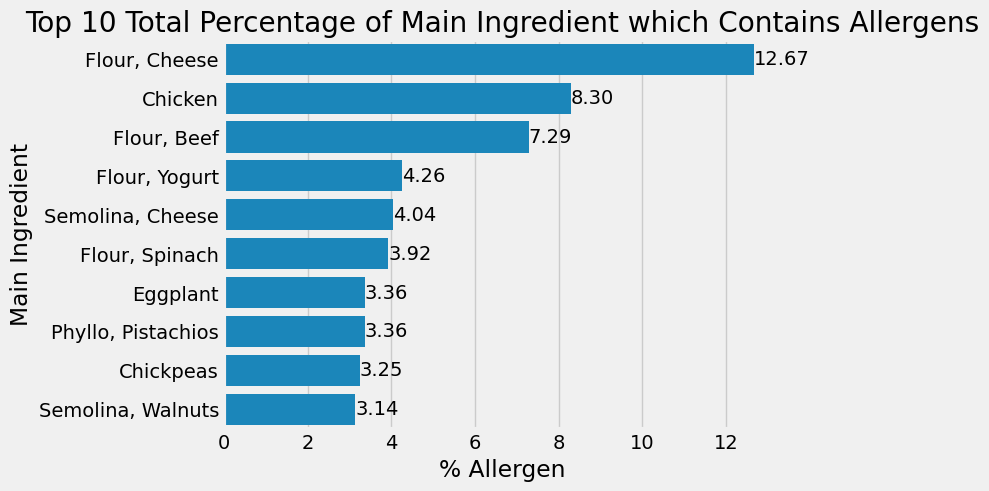

In [ ]:
df_food = (df.groupby(['Main Ingredient']).agg({'Is_Allergen' : 'sum'})/df['Is_Allergen'].sum()*100).reset_index()
df_food.columns = ['Main Ingredient','Percent_Allergen']
df_food
ax = sns.barplot(y='Main Ingredient', x='Percent_Allergen', data=df_food.nlargest(10,'Percent_Allergen'))
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.xlabel('% Allergen')
plt.ylabel('Main Ingredient')
plt.title('Top 10 Total Percentage of Main Ingredient which Contains Allergens')

In [ ]:
df['Allergens'].value_counts()

,count
Allergens,
"Wheat, Dairy",260
Dairy,182
"Wheat, Nuts",143
"Wheat, Dairy, Nuts",87
Wheat,69
Sesame,56
Nuts,15
Soybeans,5
Shellfish,5


In [9]:
df.duplicated().sum()

np.int64(604)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1033 entries, 0 to 1429
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Food Product     1033 non-null   object 
 1   Main Ingredient  1033 non-null   object 
 2   Sweetener        203 non-null    object 
 3   Fat/Oil          981 non-null    object 
 4   Seasoning        1019 non-null   object 
 5   Allergens        592 non-null    object 
 6   Is_Allergen      1032 non-null   float64
dtypes: float64(1), object(6)
memory usage: 64.6+ KB


In [56]:
df.isna().sum()

,0
Food Product,0
Main Ingredient,0
Sweetener,1387
Fat/Oil,52
Seasoning,14
Allergens,772
Price ($),0
Customer rating (Out of 5),0
Prediction,1


In [100]:
# استبدال 'None' بالمنوال في الأعمدة المحددة
miss_col = ['Sweetener', 'Fat/Oil', 'Seasoning']

for column in miss_col:
    # تجنب الأخطاء إذا كان العمود غير موجود أو فارغ
    if column in df.columns:
        mode_value = df[column].mode()[0] if not df[column].mode().empty else 'Unknown'
        df[column].fillna(mode_value, inplace=True)
    else:
        print(f"Column '{column}' not found in DataFrame.")

<ipython-input-100-050902e35aab>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


In [60]:
df.isna().sum()

,0
Food Product,0
Main Ingredient,0
Sweetener,0
Fat/Oil,0
Seasoning,0
Allergens,772
Price ($),0
Customer rating (Out of 5),0
Prediction,1


In [ ]:
# df_no_mv = df.dropna(axis=0)
# df_no_mv.isna().sum()

,0
Food Product,0
Main Ingredient,0
Sweetener,0
Fat/Oil,0
Seasoning,0
Allergens,0
Is_Allergen,0


In [ ]:
# df_no_mv

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Is_Allergen
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",1.0
1,Chicken Noodle Soup,Chicken broth,Sugar,Olive oil,Salt,"Chicken, Wheat, Celery",1.0
2,Cheddar Cheese,Cheese,Sugar,Olive oil,Salt,Dairy,1.0
3,Ranch Dressing,Buttermilk,Sugar,Vegetable oil,"Garlic, herbs",Dairy,1.0
4,Caramel Popcorn,Popcorn,Sugar,Butter,Salt,Dairy,1.0
...,...,...,...,...,...,...,...
1364,Beetroot Salad Deluxe,Beetroot,Sugar,Olive oil,Lemon juice,Dairy,0.0
1382,Mini Ful Medames,Fava beans,Sugar,Olive oil,"Lemon juice, Garlic",Dairy,0.0
1392,Ful Medames Deluxe,Fava beans,Sugar,Olive oil,"Lemon juice, Garlic",Dairy,0.0
1406,Ful Medames Special,Fava beans,Sugar,Olive oil,"Lemon juice, Garlic",Dairy,0.0


In [ ]:
# df=df_no_mv

In [61]:
#for filling missing values with string 'None'
df.fillna("None", inplace=True)

## Converting categorial data into numerical data

In [14]:
categorical

['Food Product',
 'Main Ingredient',
 'Sweetener',
 'Fat/Oil',
 'Seasoning',
 'Allergens']

### Feature encoding (One Hot Encoding / Dummy Variables)
In order to improve the usability of the numerical model's data, this step will convert categorical variables into numerical variables using *One Hot Encoding*. As a result, each category will have binary columns.

In [62]:
Food_Ingredients = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning']
df_encoded = pd.get_dummies(df[Food_Ingredients])

In [63]:
df_encoded

,Food Product_Almond Cookies,Food Product_Aloo Gobi,Food Product_Apple,Food Product_Apple Cider,Food Product_Apple Crisp,Food Product_Apple Pie,Food Product_Arabian Baba Ghanoush,Food Product_Arabian Falafel,Food Product_Arabian Fattoush,Food Product_Arabian Harira,...,"Seasoning_Tzatziki sauce, tomatoes, onions","Seasoning_Tzatziki sauce, vegetables",Seasoning_Vanilla extract,"Seasoning_Vanilla pudding mix, cookies",Seasoning_Vegetable broth,Seasoning_Vegetable oil,Seasoning_Vegetables,"Seasoning_Vegetables, spices","Seasoning_Yogurt, Kashmiri red chili","Seasoning_Za'atar, Salt"
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1633,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1634,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1635,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
import joblib

# حفظ الأعمدة المستخدمة كـ processor (بنية الـ input بعد get_dummies)
joblib.dump(df_encoded.columns.tolist(), "input_columns.pkl")

print("✅ Processor saved successfully: input_columns.pkl")


✅ Processor saved successfully: input_columns.pkl


In [65]:
df['Allergen_Detected'] = df['Allergens'].apply(lambda x: 1 if pd.notnull(x) and x != "None" else 0)
allergen_list = list(set([allergen.strip() for allergens in df['Allergens'].dropna() for allergen in allergens.split(',')]))
for allergen in allergen_list:
    df[allergen] = df['Allergens'].apply(lambda x: 1 if allergen in str(x) else 0)

In [66]:
df.head(20)

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction,Allergen_Detected,...,Strawberries,Mustard,Anchovies,None,Eggs,Fish,Pine nuts,Oats,Chicken,Coconut
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,Contains,1,...,0,0,0,0,0,0,0,0,0,0
1,Chicken Noodle Soup,Chicken broth,Sugar,Olive oil,Salt,"Chicken, Wheat, Celery",19.65,4.1,Contains,1,...,0,0,0,0,0,0,0,0,1,0
2,Cheddar Cheese,Cheese,Sugar,Olive oil,Salt,Dairy,10.83,3.7,Contains,1,...,0,0,0,0,0,0,0,0,0,0
3,Ranch Dressing,Buttermilk,Sugar,Vegetable oil,"Garlic, herbs",Dairy,9.92,2.3,Contains,1,...,0,0,0,0,0,0,0,0,0,0
4,Caramel Popcorn,Popcorn,Sugar,Butter,Salt,Dairy,6.14,3.2,Contains,1,...,0,0,0,0,0,0,0,0,0,0
5,Caesar Salad,Romaine lettuce,Sugar,Olive oil,Parmesan cheese,Dairy,14.99,4.8,Contains,1,...,0,0,0,0,0,0,0,0,0,0
6,Caesar Wrap,Grilled chicken,Sugar,Caesar dressing,"Lettuce, Parmesan cheese",Dairy,12.45,3.8,Contains,1,...,0,0,0,0,0,0,0,0,0,0
7,Strawberry Smoothie,Strawberries,Honey,"Yogurt (milk, cultures)",Spices,Dairy,13.37,3.2,Contains,1,...,0,0,0,0,0,0,0,0,0,0
8,Cheese Pizza,Cheese,Sugar,Olive oil,Tomato sauce,Dairy,18.90,4.2,Contains,1,...,0,0,0,0,0,0,0,0,0,0
9,Margherita Pizza,Cheese,Sugar,Olive oil,"Tomato sauce, basil",Dairy,16.95,3.1,Contains,1,...,0,0,0,0,0,0,0,0,0,0


In [67]:
X = df_encoded
y_binary = df['Allergen_Detected']
y_multilabel = df[allergen_list]

In [68]:
allergen_list

['Shellfish',
 'Nuts',
 'Almonds',
 'Cocoa',
 'Dairy',
 'Soybeans',
 'Sesame',
 'Milk',
 'Peanuts',
 'Pork',
 'Celery',
 'Wheat',
 'Rice',
 'Strawberries',
 'Mustard',
 'Anchovies',
 'None',
 'Eggs',
 'Fish',
 'Pine nuts',
 'Oats',
 'Chicken',
 'Coconut']

In [72]:
y_binary.tail(100)

,Allergen_Detected
1537,0
1538,0
1539,0
1540,0
1541,0
...,...
1632,0
1633,0
1634,0
1635,0


<Axes: title={'center': 'Allergen_Detected'}, xlabel='Allergen_Detected'>

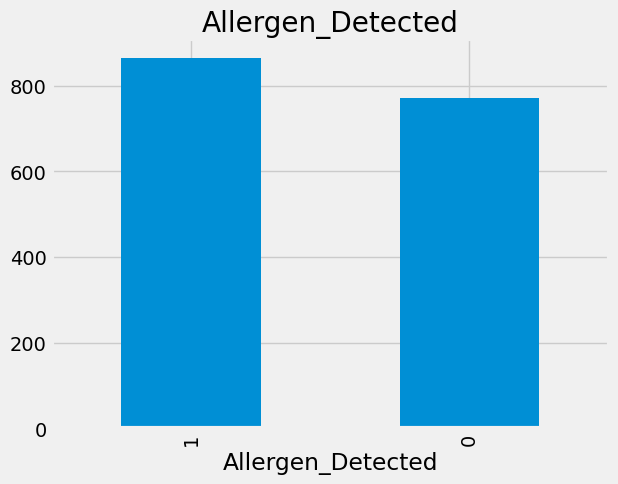

In [73]:
# plot.bar(title='') function is used to plot bargraph
df["Allergen_Detected"].value_counts().plot.bar(title="Allergen_Detected")

In [89]:
# plot.bar(title='') function is used to plot bargraph
df["Allergens"].isna().sum()




np.int64(0)

In [70]:
y_multilabel

,Shellfish,Nuts,Almonds,Cocoa,Dairy,Soybeans,Sesame,Milk,Peanuts,Pork,...,Strawberries,Mustard,Anchovies,None,Eggs,Fish,Pine nuts,Oats,Chicken,Coconut
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Splitting the data into training and testing sets

In [74]:
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42)
_, _, y_train_multilabel, y_test_multilabel = train_test_split(X, y_multilabel, test_size=0.2, random_state=42)

In [75]:
y_train_multilabel

,Shellfish,Nuts,Almonds,Cocoa,Dairy,Soybeans,Sesame,Milk,Peanuts,Pork,...,Strawberries,Mustard,Anchovies,None,Eggs,Fish,Pine nuts,Oats,Chicken,Coconut
63,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1018,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1046,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
860,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Training the data using Random Forest Classifier

In [76]:
binary_model = RandomForestClassifier(random_state=42)
binary_model.fit(X_train, y_train_binary)

RandomForestClassifier(random_state=42)

# Training the data using MultiOutputClassifier

In [77]:
multi_label_model = MultiOutputClassifier(RandomForestClassifier(random_state=42))
multi_label_model.fit(X_train, y_train_multilabel)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

# Prediction

In [78]:
y_pred_binary = binary_model.predict(X_test)
binary_accuracy = accuracy_score(y_test_binary, y_pred_binary)

In [79]:
y_pred_multilabel = multi_label_model.predict(X_test)
multi_label_accuracy = 1 - hamming_loss(y_test_multilabel, y_pred_multilabel)

In [80]:
import joblib

# # حفظ النموذج الثنائي
# joblib.dump(binary_model, "binary_allergen_model.pkl")

# حفظ النموذج متعدد التسميات
joblib.dump(multi_label_model, "multilabel_allergen_model.pkl")

print("Models saved successfully.")


Models saved successfully.


In [81]:
import joblib
# ... بعد بناء allergen_list في الـ Notebook:
joblib.dump(allergen_list, "allergen_list.pkl")


['allergen_list.pkl']

# Evaluation

In [82]:
#calculating accuracy for binary classification
print(f"Binary Classification Accuracy (Contains Allergen or not): {binary_accuracy:.2f}")
#calculating accuracy for multi-label classification
print(f"Multi-label Classification Accuracy (Specific Allergens): {multi_label_accuracy:.2f}")

Binary Classification Accuracy (Contains Allergen or not): 0.96
Multi-label Classification Accuracy (Specific Allergens): 0.99


In [90]:
# Model Evaluation
def model_eval_binary(model):
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    recall_train = recall_score(y_train_binary, Y_pred_train)
    recall_test = recall_score(y_test_binary, Y_pred_test)
    precision_train = precision_score(y_train_binary, Y_pred_train)
    precision_test = precision_score(y_test_binary, Y_pred_test)
    accuracy_train = accuracy_score(y_train_binary, Y_pred_train)
    accuracy_test = accuracy_score(y_test_binary, Y_pred_test)
    roc_auc_train = roc_auc_score(y_train_binary, Y_pred_train)
    roc_auc_test = roc_auc_score(y_test_binary, Y_pred_test)
    f1_train = f1_score(y_train_binary, Y_pred_train)
    f1_test = f1_score(y_test_binary, Y_pred_test)
    print('Recall train score:', + recall_train)
    print('Recall test score:', + recall_test)
    print('Precision train score:', + precision_train)
    print('Precision test score:', + precision_test)
    print('Accuracy train:', + accuracy_train)
    print('Accuracy test:', + accuracy_test)
    print('Roc_auc train score:', + roc_auc_train)
    print('Roc_auc test score:', + roc_auc_test)
    print('f1 train score:', + f1_train)
    print('f1 test score', + f1_test)
    cm_test= confusion_matrix(y_test_binary, Y_pred_test)
    cm_display = ConfusionMatrixDisplay(cm_test, display_labels = ['Not Allergen','Allergen'])
    cm_display.plot()
    plt.show()
    return recall_train, recall_test

Recall train score: 1.0
Recall test score: 0.9651162790697675
Precision train score: 1.0
Precision test score: 0.9595375722543352
Accuracy train: 1.0
Accuracy test: 0.9603658536585366
Roc_auc train score: 1.0
Roc_auc test score: 0.9601222420989863
f1 train score: 1.0
f1 test score 0.9623188405797102


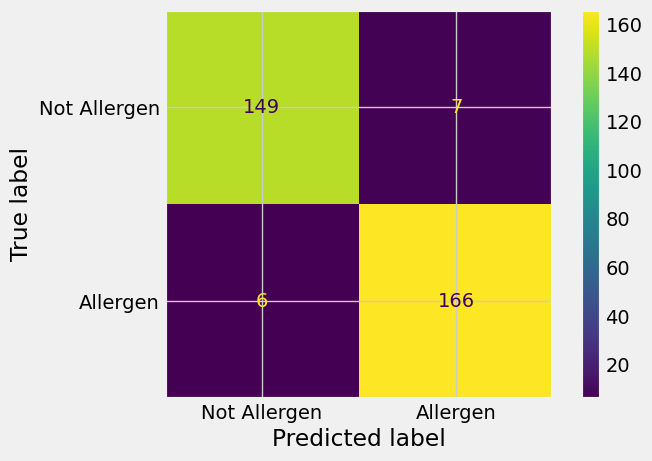

(1.0, 0.9651162790697675)

In [91]:
model_eval_binary(binary_model)

In [92]:
# Prediction function
def allergens_detection(food_product, main_ingredient, sweetener, fat_oil, seasoning):
        input_data = {
        'Food Product': food_product.title(),
        'Main Ingredient': main_ingredient.title(),
        'Sweetener': sweetener.capitalize(),
        'Fat/Oil': fat_oil.capitalize(),
        'Seasoning': seasoning.capitalize()
    }
    # Encode input data
        input_df = pd.DataFrame([input_data])
        input_encoded = pd.get_dummies(pd.DataFrame([input_data]))
    # Make sure columns align with training data
        input_encoded = input_encoded.reindex(columns=X.columns, fill_value=0)  # Align columns

    # Predict allergen presence
        allergen_present = binary_model.predict(input_encoded)[0]
        if allergen_present == 0:
            return "No allergens present."

    # Predict specific allergens
        specific_allergens = multi_label_model.predict(input_encoded)
        allergens_present = [allergen for allergen, present in zip(allergen_list, specific_allergens[0]) if present]
        return f"Allergens present: {', '.join(allergens_present)}" if allergens_present else "No specific allergens identified."

In [93]:
# test Prediction
example_input = {
    'Food Product': 'Roasted Brussels Sprouts',
    'Main Ingredient': 'Brussels sprouts',
    'Sweetener': 'None',
    'Fat/Oil': 'Olive oil',
    'Seasoning': 'Balsamic glaze'
}
print(allergens_detection('Chocolate cake', 'flour', 'Sugar', 'Butter','Cinnamon, Nutmeg' ))
print(allergens_detection('Roasted Brussels Sprouts', 'Brussels sprouts', '', 'Olive oil','Balsamic glaze' ))


Allergens present: Dairy, Wheat
No specific allergens identified.


In [94]:
# to define the Gradio interface
def allergen_detection_interface():
    # Inputs for food product, main ingredient, sweetener, fat/oil, seasoning
    food_product_input = gr.Textbox(label="Food Product", placeholder="Enter food product",lines=1)
    main_ingredient_input = gr.Textbox(label="Main Ingredient", placeholder="Enter main ingredient")
    sweetener_input = gr.Textbox(label="Sweetener", placeholder="Enter sweetener", lines=1)
    fat_oil_input = gr.Textbox(label="Fat/Oil Ingredients", placeholder="Enter fat/oil (comma-separated)", lines = 1)
    seasoning_input = gr.Textbox(label="Seasoning", placeholder="Enter seasoning", lines = 1)

    output = gr.Textbox(label="Allergen Prediction", interactive=False)


    # Gradio interface
    gr.Interface(
        fn=allergens_detection,
        inputs=[food_product_input, main_ingredient_input, sweetener_input, fat_oil_input, seasoning_input],
        outputs=output,
        description="Enter food ingredients to check for allergens.",
        title = 'Allergens Detection Tool',

    ).launch()

allergen_detection_interface()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e75c21b3e1d1dbe68c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# DATA VISUALISATION

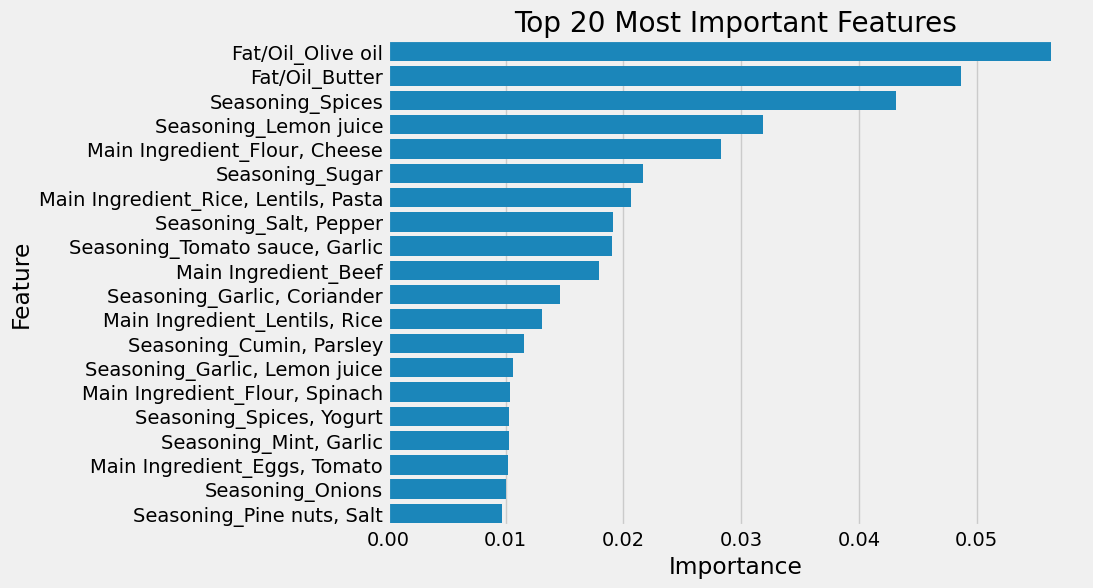

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = binary_model.feature_importances_
features = X.columns

feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

top_n = 20  # number of top features to display
top_features = feature_df.sort_values(by='Importance', ascending=False).head(top_n)


plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title(f'Top {top_n} Most Important Features')
plt.show()



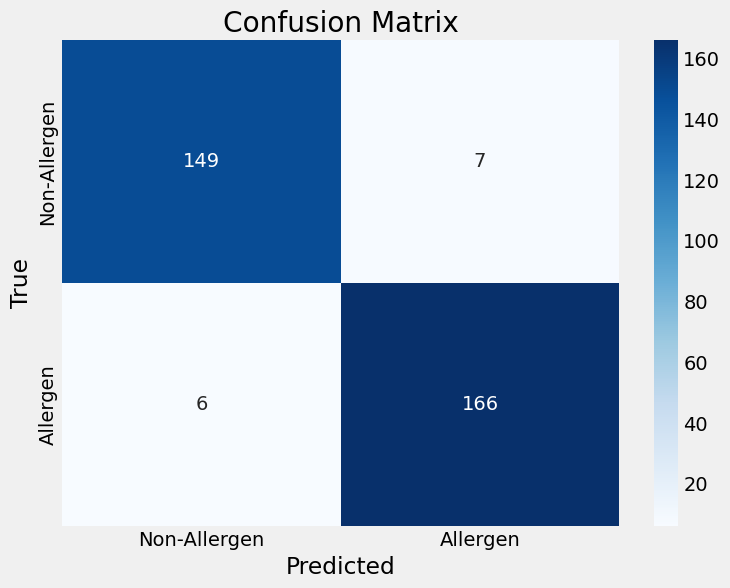

In [96]:
#confusion matrix for model evaluation
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_binary, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Allergen", "Allergen"], yticklabels=["Non-Allergen", "Allergen"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



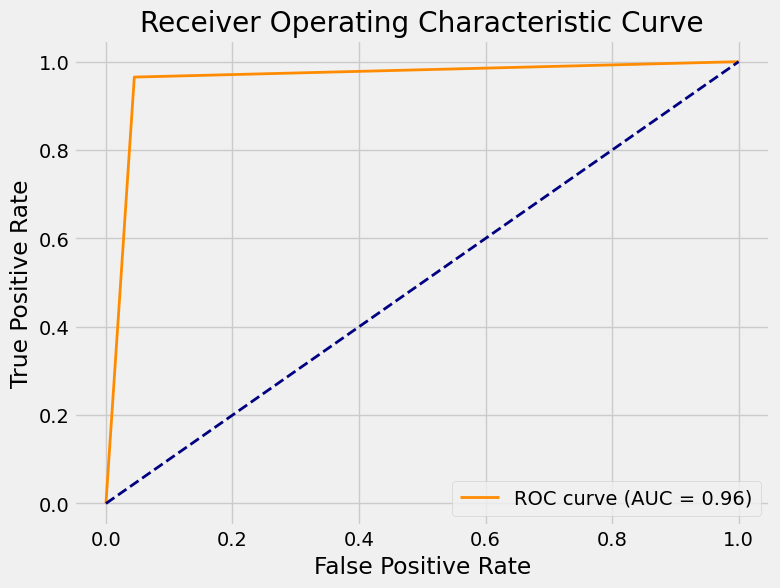

In [97]:
#ROC curve and AUC for model evaluation
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


In [98]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),

}

for name, model in models.items():
    model.fit(X_train, y_train_binary)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n{name} Performance:")
    print(classification_report(y_test_binary, y_pred))
    print(f"ROC AUC: {roc_auc_score(y_test_binary, y_proba):.4f}")


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       156
           1       0.96      0.97      0.96       172

    accuracy                           0.96       328
   macro avg       0.96      0.96      0.96       328
weighted avg       0.96      0.96      0.96       328

ROC AUC: 0.9959

Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       156
           1       0.95      0.93      0.94       172

    accuracy                           0.94       328
   macro avg       0.94      0.94      0.94       328
weighted avg       0.94      0.94      0.94       328

ROC AUC: 0.9832

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       156
           1       0.96      0.97      0.97       172

    accuracy                           0.96       328
  

In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train_binary)

best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC AUC: {grid_search.best_score_:.4f}")

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best ROC AUC: 0.9967


In [101]:
# حفظ النموذج الثنائي
joblib.dump(best_model, "binary_allergen_model.pkl")

['binary_allergen_model.pkl']

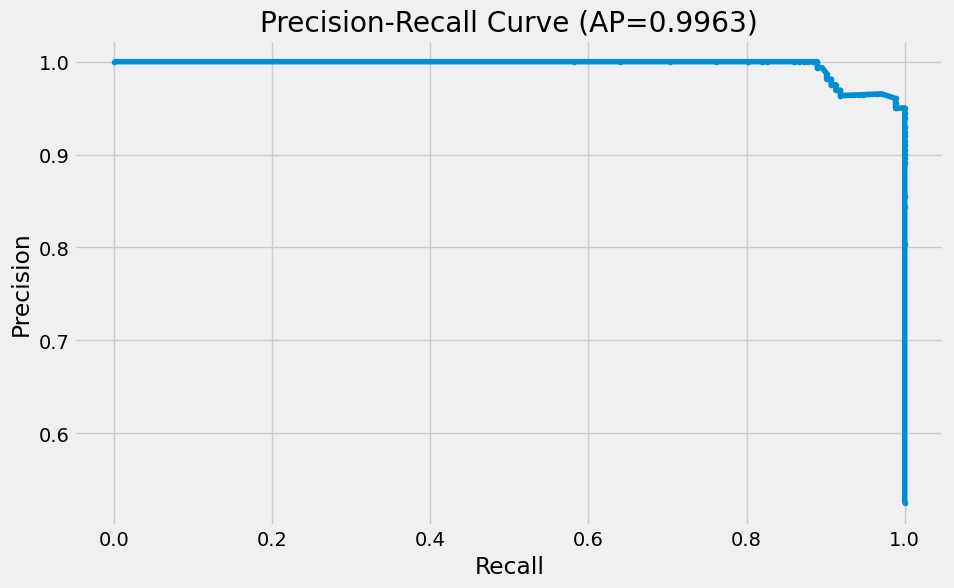

In [102]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_proba = best_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test_binary, y_proba)
ap_score = average_precision_score(y_test_binary, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP={ap_score:.4f})')
plt.show()